In [1]:
%cd datasets/ml-1m

/Users/abichalghosh/Documents/1-3/SWM/Project/light_fm/datasets/ml-1m


In [2]:
!ls

README            movies.csv        ratings.dat       users.dat
interactions.npz  movies.dat        user_features.npz
item_features.npz ratings.csv       users.csv


In [3]:
import time
import sys
import os
import pandas as pd
import pickle
import numpy as np
# import tqdm
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
%matplotlib inline

from lightfm import LightFM
from scipy import sparse
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k
from lightfm.evaluation import auc_score
from lightfm.evaluation import recall_at_k
from lightfm.evaluation import reciprocal_rank

/Users/abichalghosh/miniconda3/lib/python3.11/site-packages/lightfm/_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


In [4]:
SEED = 42
epochs = 34

In [5]:
data = sparse.load_npz("interactions.npz")
item_f = sparse.load_npz("item_features.npz")
train, test = random_train_test_split(data, random_state=np.random.RandomState(SEED))

In [6]:
nf_model = LightFM(learning_rate=0.221, loss='warp', random_state=np.random.RandomState(SEED))
f_model = LightFM(learning_rate=0.221, loss='warp', random_state=np.random.RandomState(SEED))
nf_duration = []
f_duration = []
nf_precision = []
f_precision = []
nf_auc = []
f_auc = []

In [7]:
for epoch in range(1, epochs+1):
  start = time.time()
  nf_model.fit_partial(train, epochs=1)
  nf_duration.append(time.time()-start)
  nf_precision.append(precision_at_k(nf_model, test).mean())
  nf_auc.append(auc_score(nf_model, test).mean())
  if(epoch%10==0):
    print("No features model epoch :"+str(epoch)+" completed")

for epoch in range(1, epochs+1):
  start = time.time()
  f_model.fit_partial(train, item_features=item_f, epochs=1)
  f_duration.append(time.time()-start)
  f_precision.append(precision_at_k(f_model, test, item_features=item_f).mean())
  f_auc.append(auc_score(f_model, test, item_features=item_f).mean())
  if(epoch%10==0):
    print("Features model epoch :"+str(epoch)+" completed")

No features model epoch :10 completed
No features model epoch :20 completed
No features model epoch :30 completed
Features model epoch :10 completed
Features model epoch :20 completed
Features model epoch :30 completed


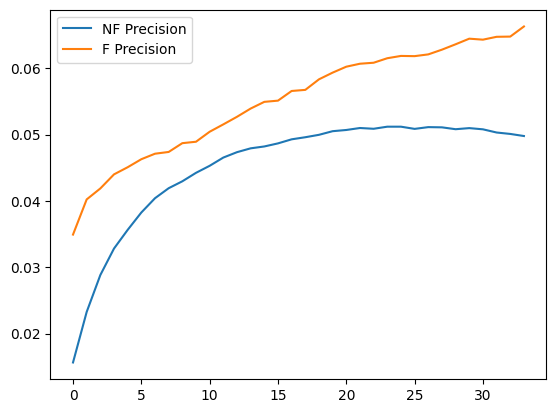

In [8]:
x = np.arange(epochs)
plt.plot(x, np.array(nf_precision))
plt.plot(x, np.array(f_precision))
plt.legend(['NF Precision', 'F Precision'], loc='upper left')
plt.show()

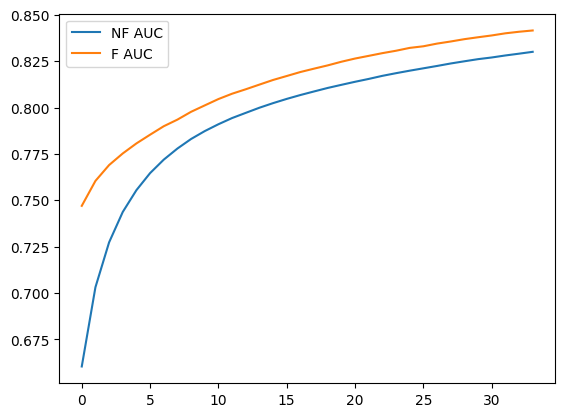

In [9]:
x = np.arange(epochs)
plt.plot(x, np.array(nf_auc))
plt.plot(x, np.array(f_auc))
plt.legend(['NF AUC', 'F AUC'], loc='upper left')
plt.show()